# Lecture 18 - Lab: PCA and PCR
## CMSE 381 - Fall 2022
## Oct 26, 2022



In this module we are going to test out the ridge/lasso methods we discussed in class from Chapter 6.2, and the PCR ideas from Chapter 6.3.

In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

import seaborn as sns

# ML imports we've used previously
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# 1. PCA on Penguins
![Palmer Penguins Picture](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

*Artwork by @allison_horst*


For this lab, we are going to again use the <a href = "https://allisonhorst.github.io/palmerpenguins/">Palmer Penguins</a> data set by Allison Horst, Alison Hill, and Kristen Gorman. You should have done this in the last lab, but if you don't have the package installed to get the data, you can run 
```
pip install palmerpenguins
```
to have access to the data. 

In [2]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Before we get to the full version, let's just take a look at two of the columns: flipper length and bill length. A nice thing we can do is to also color the data by which species label the data point has. 

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

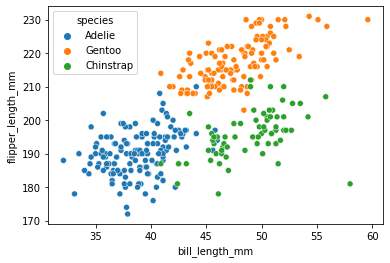

In [3]:
sns.scatterplot(x = penguins.bill_length_mm, 
                y = penguins.flipper_length_mm, 
                hue = penguins.species)



Before we get to it, we're going to just work with the columns that are numeric.  

In [4]:
penguins_num = penguins.select_dtypes(np.number)
penguins_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,39.1,18.7,181.0,3750.0,2007
1,39.5,17.4,186.0,3800.0,2007
2,40.3,18.0,195.0,3250.0,2007
4,36.7,19.3,193.0,3450.0,2007
5,39.3,20.6,190.0,3650.0,2007


We will also use mean centered data to make the visualization easier (meaning shifting our data to have mean 0 in every column, and have standard deviation 1). 

In [5]:
p_normalized = (penguins_num - penguins_num.mean())/penguins_num.std()
p_normalized.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,-0.894695,0.779559,-1.424608,-0.567621,-1.281813
1,-0.821552,0.119404,-1.067867,-0.505525,-1.281813
2,-0.675264,0.424091,-0.425733,-1.188572,-1.281813
4,-1.333559,1.084246,-0.568429,-0.940192,-1.281813
5,-0.858123,1.744400,-0.782474,-0.691811,-1.281813


## PCA with just two input columns

To try to draw pictures similar to what we just saw on the slides, we'll first focus on two of the columns. 

In [6]:
penguins_subset2 = p_normalized[['bill_length_mm', 'flipper_length_mm']]
penguins_subset2

,bill_length_mm,flipper_length_mm
0,-0.894695,-1.424608
1,-0.821552,-1.067867
2,-0.675264,-0.425733
4,-1.333559,-0.568429
5,-0.858123,-0.782474
...,...,...
339,2.159064,0.430446
340,-0.090112,0.073705
341,1.025333,-0.568429
342,1.244765,0.644491


We run PCA using the `PCA` command from `scikitlearn`.

In [7]:
from sklearn.decomposition import PCA

In [8]:
# Set up the PCA object
pca = PCA(n_components=2)

# Fit it using our data
pca.fit_transform(penguins_subset2)

array([[-1.63999499e+00,  3.74704522e-01],
       [-1.33602033e+00,  1.74171030e-01],
       [-7.78521833e-01, -1.76445140e-01],
       [-1.34490871e+00, -5.41028753e-01],
       [-1.16007736e+00, -5.34925214e-02],
       [-1.66585528e+00,  3.48844231e-01],
       [-9.20753435e-01, -3.18676742e-01],
       [-1.33094126e+00,  5.82856620e-01],
       [-1.20013757e+00, -1.94454356e-01],
       [-1.36418769e+00, -1.06481589e+00],
       [-1.76144537e+00, -1.50352379e-01],
       [-9.85404163e-01, -3.83327470e-01],
       [-3.93156999e-01,  7.11643424e-03],
       [-2.09635939e+00, -3.84364768e-01],
       [-9.19543462e-02,  6.11023976e-01],
       [-2.16124259e+00,  5.59768333e-01],
       [-1.87146784e+00,  2.44133298e-01],
       [-1.65015313e+00, -4.42666658e-01],
       [-1.55456304e+00,  5.65299514e-02],
       [-1.72923624e+00,  3.86364900e-01],
       [-1.82863563e+00, -4.19345902e-01],
       [-1.34514118e+00,  4.67755077e-01],
       [-1.15626806e+00,  2.53021671e-01],
       [-2.

The `pca.components_` store information about the lines we are going to project our data onto. 

In [9]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

(-2.426146908439037,
 3.1053642574684917,
 -2.2772189966421617,
 3.254292169265367)

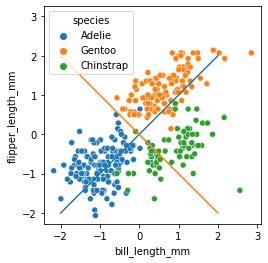

In [10]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)

for i, comp in enumerate(pca.components_):
    slope = comp[1]/comp[0]
    plt.plot(np.array([-2,2]), slope*np.array([-2,2]))
    
plt.axis('square')

A common way to look at the relative importance of the PC's is to draw these components as vectors with length based on the explained variance. 

In [11]:
pca.explained_variance_

array([1.65309564, 0.34690436])

(-2.426146908439037,
 3.1053642574684917,
 -2.2772189966421617,
 3.254292169265367)

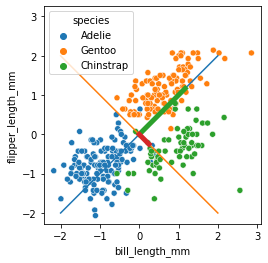

In [12]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    slope = comp[1]/comp[0]
    plt.plot(np.array([-2,2]), slope*np.array([-2,2]))
    
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )

plt.axis('square')

The next important part are the PC's, which we can get from the `pca` object as follows. I'm going to put them in a dataframe to make drawing and visualization easier. 

In [13]:
# The transform function takes in bill,flipper data points, 
# and returns a PC1,PC2 coordinate for each one. 
penguins_pca = pca.transform(penguins_subset2)
penguins_pca = pd.DataFrame(data = penguins_pca, columns = ['PC1', 'PC2'])
penguins_pca.head()

,PC1,PC2
0,-1.639995,0.374705
1,-1.336020,0.174171
2,-0.778522,-0.176445
3,-1.344909,-0.541029
4,-1.160077,-0.053493


&#9989; **<font color=red>Do this:</font>** What are the PC coordinates for the first data point (index 0)?  Which quadrant would this point be drawn in? 


it would be in quadrant 2

The PC's can be thought of as how far along their associated line the point would be projected. Here's one way to draw all the projections. 

(-2.426146908439037,
 3.1053642574684917,
 -2.2932134979887167,
 3.238297667918812)

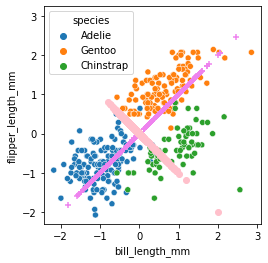

In [14]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)


# Show points projected onto the 1st PC line
X1 = penguins_pca.PC1*pca.components_[0,0]
Y1 = penguins_pca.PC1*pca.components_[0,1]

plt.scatter(X1,Y1, marker = '+', color = 'violet')


# Show points projected onto the 2st PC line
X2 = penguins_pca.PC2*pca.components_[1,0]
Y2 = penguins_pca.PC2*pca.components_[1,1]

plt.scatter(X2,Y2, marker = 'o', color = 'pink')
plt.axis('square')

Below is code that emphasizes the projected points. 

&#9989; **<font color=red>Do this:</font>** the value of `index` below is just picking out a different point in our data set.  Mess around with this number. How do the X and star points move around as you change `index`? 

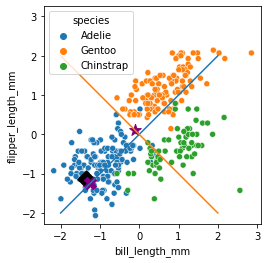

In [15]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)
plt.axis('square')

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    slope = comp[1]/comp[0]
    plt.plot(np.array([-2,2]), slope*np.array([-2,2]))

#===========
# Emphasize one point and its projections
#===========

index = 10 #<---------- play with this!

# Here's one data point
plt.scatter([penguins_subset2.iloc[index,0]],
            [penguins_subset2.iloc[index,1]], 
            marker = 'D', color = 'black', s = 150)

# Here's the projection of that point on PC1 (X shape)
plt.scatter([X1[index]], [Y1[index]], 
           marker = 'X', color = 'purple', s = 150)

# And here's the projection of that point on PC2 (star)
plt.scatter([X2[index]], [Y2[index]], 
           marker = '*', color = 'purple', s = 150)



The star moves up and down the orange line and the X moves up and down the blue line giving the positions on the axis of the indexed point.

Everything we just did is great for understanding what the PCA is doing, but in reality, we're usually going to be looking at the data in the transformed space. 

&#9989; **<font color=red>Do this:</font>** Make a scatter plot of PC1 and PC2. Color the points by `penguins.species`. What do you notice about how the points have moved from the (`bill`, `flipper`) scatter plot? 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

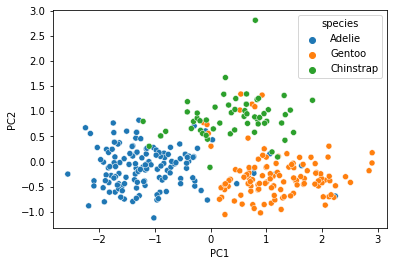

In [16]:
# Your code here
sns.scatterplot(data = penguins_pca, 
                x = 'PC1', 
                y = 'PC2', 
                hue = penguins.species)

## Penguins PCA with all columns

We used only two columns above for visualization, but we can instead use all the input columns to run our PCA. 

In [17]:
pca = PCA(n_components=4)
penguins_pca_all = pca.fit_transform(penguins_num)
penguins_pca_all = pd.DataFrame(data = penguins_pca_all, 
                                columns = ['PC1', 'PC2', 'PC3', 'PC4'])
penguins_pca_all.head()

,PC1,PC2,PC3,PC4
0,-457.325096,13.376298,1.247904,-0.376474
1,-407.252228,9.205245,-0.032667,-1.090217
2,-957.044699,-8.128321,-2.491467,0.720823
3,-757.115824,-1.838910,-4.880569,2.073668
4,-557.177325,3.416994,-1.129267,2.629297


&#9989; **<font color=red>Do this:</font>** Make a scatter plot of PC1 and PC2 using this new model, and again color the points by `penguins.species`. What do you notice about how the PC plot has changed from the previous setting? 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

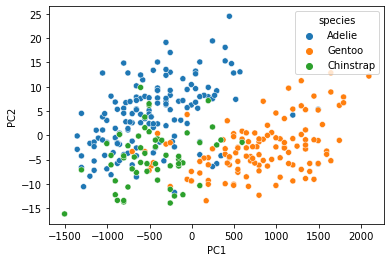

In [18]:
# your code here
sns.scatterplot(data = penguins_pca_all, 
                x = 'PC1', 
                y = 'PC2', 
                hue = penguins.species)


![Stop Icon](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/180px-Vienna_Convention_road_sign_B2a.svg.png)

Great, you got to here! Hang out for a bit, there's more lecture before we go on to the next portion. 

# PCR on Hitters Data

# Loading in the data

Ok, here we go, let's play with a baseball data set again. Note this cleanup is all the same as the last lab. 

In [19]:
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis = 1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [20]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    uint8  
 17  Division_W   263 non-null    uint8  
 18  NewLeague_N  263 non-null    uint8  
dtypes: float

# Principal Component Regression 

Ok, let's take a hard left turn and go try out some of the dimension reduction methods from Section 6.3. `Scikit-learn` doesn't have a built in function to do PCR (aka PCA and then regression) but it's just as easy for us to do it ourselves. 

First step, let's figure out the `PCA` function.

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale #<--- this does the scaling of variables for us


In [22]:
pca = PCA()
print(X.shape)
X_reduced = pca.fit_transform(scale(X))
print(X_reduced.shape)

(263, 19)
(263, 19)


"But Dr. Munch, you said PCA was supposed to do dimension reduction, why is my feature output the same size?"

Glad you asked, young data scientist. The PCA command outputs all of the PCs, all the way up through $p=19$ the original number of dimensions. 

So, if I want the first three PCs, I can get them out as follows. I'll put it in a data frame just to add column labels, but you don't need to do that.

In [23]:
First3PCs = X_reduced[:,:3]

pd.DataFrame(First3PCs, columns = ['Z1','Z2', 'Z3'])

,Z1,Z2,Z3
0,-0.009649,1.870522,1.265145
1,0.411434,-2.429422,-0.909193
2,3.466822,0.825947,0.555469
3,-2.558317,-0.230984,0.519642
4,1.027702,-1.573537,1.331382
...,...,...,...
258,-0.331167,-0.165663,0.775890
259,3.246183,-0.543315,1.209150
260,-1.094609,-0.751386,-0.935937
261,1.977682,-2.184517,-0.282012


In [24]:
pd.DataFrame(np.array(X)[:,:3], columns = ['X1','X2', 'X3'])

,X1,X2,X3
0,315.0,81.0,7.0
1,479.0,130.0,18.0
2,496.0,141.0,20.0
3,321.0,87.0,10.0
4,594.0,169.0,4.0
...,...,...,...
258,497.0,127.0,7.0
259,492.0,136.0,5.0
260,475.0,126.0,3.0
261,573.0,144.0,9.0


Now we can just do regression on the PCs like before. 

In [25]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_reduced[:,:3], y)
mean_squared_error(y,regr.predict(X_reduced[:,:3]))

117234.531905816

&#9989; **<font color=red>Do this:</font>** My code above contains the rookie mistake of only reporting training error. Write modified code to return the 10-fold CV error of linear regression on the first 3 PCs.

In [26]:
# Your code here #
from sklearn.model_selection import cross_val_score

regr  = LinearRegression()
print(np.mean(cross_val_score(regr, First3PCs, y, scoring='neg_mean_squared_error', cv=10)))


# Hint: while not necessary, the following command might make 
# for some massively shortened code.
# If using this command, be sure to set 
#    scoring='neg_mean_squared_error'
# to force it to chose the best model using MSE. Otherwise, 
# the internal default uses R^2. 



-125936.4971858609


&#9989; **<font color=red>Do this:</font>** Take the code you figured out above to get the score for 10-fold CV on the first 3 PCs, and include it in the for-loop below to see how the MSE changes as the number of PCs you use changes. 

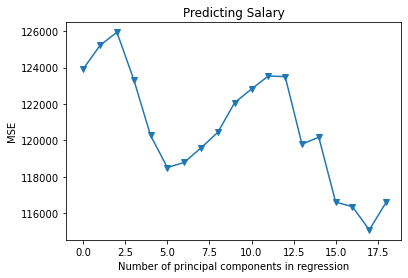

In [27]:
n = len(X_reduced)
regr = LinearRegression()
mse = []

# Calculate MSE using CV for the 19 principle components, adding one component at a time.
for i in np.arange(1, 20): # i is the number of principal components to use each time
    # ====
    score = cross_val_score(regr, X_reduced[:,:i], y, cv = 10, scoring='neg_mean_squared_error') # Your code from above goes here!
    # ====

    mse.append(np.mean(-score))
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Predicting Salary')
plt.xlim(xmin=-1);

In [28]:
mse.index(min(mse))

17

&#9989; **<font color=red>Q:</font>** Based on the graph you generated above, how many PCs do you think you should use? 

*Note: Based on graphs I generated, I can see a few different options for what I might decide to use for number of principal components. This is one of those cases where you potentially have a different answer and/or reasoning from your neighbor, so I enourage you to talk this one through with your group.*


*Your answer here*

&#9989; **<font color=red>Q:</font>** Of the models you've built so far (Ridge, Lasso, and PCR), which would you choose to use and why? 

*Note: This goes in the no-one-right-answer bucket. Go argue with your group.*


*Your answer here*



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.